<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]


feature_cols = num_cols + cat_cols
target_col = 'Churn'
print(len(feature_cols))

19


In [ ]:
for name in feature_cols:
  print(name, data[name].unique())

data.info()


ClientPeriod [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent ['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 

In [ ]:
data.head()
data.isnull()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5278,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
data.isnull().sum()
# the np.nan data is not exist ini this data set

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

[0 1]
0    3898
1    1384
Name: Churn, dtype: int64


([<matplotlib.patches.Wedge at 0x7fc492538280>,
 [Text(-0.7478930722742168, 0.8066324766857789, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')])

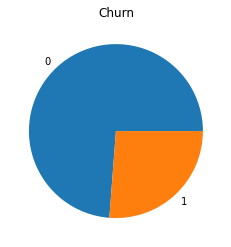

In [ ]:
print(data[target_col].unique())
labels_pie = data[target_col].unique()
proba = data[target_col].value_counts()
print(proba)
plt.title(target_col)
plt.pie(proba, labels = labels_pie)


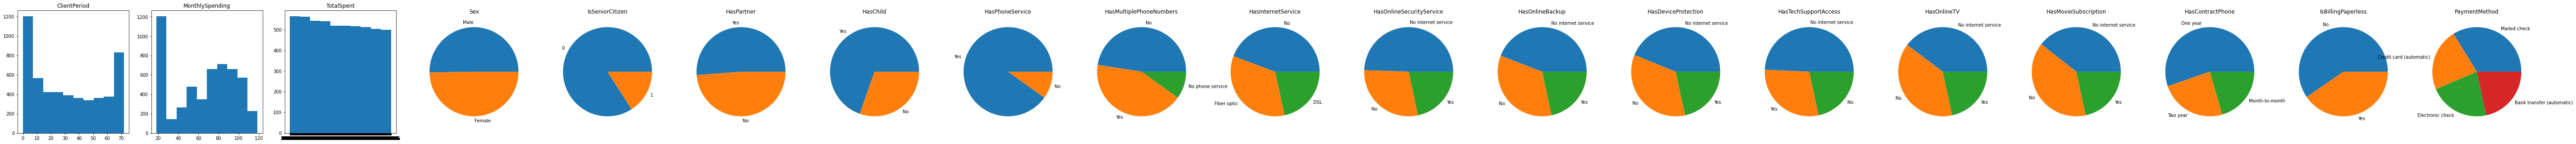

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=len(feature_cols), figsize = (100, 5))

for id, name in enumerate(feature_cols):   
  if name in num_cols:
    axs[id].hist(data[name])
    axs[id].set_title(name)
  else:
    unique_name = data[name].unique()
    axs[id].pie(data[name].value_counts(), labels = unique_name)
    axs[id].set_title(name)
  




(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc48fce1d90>,
      dtype=object)

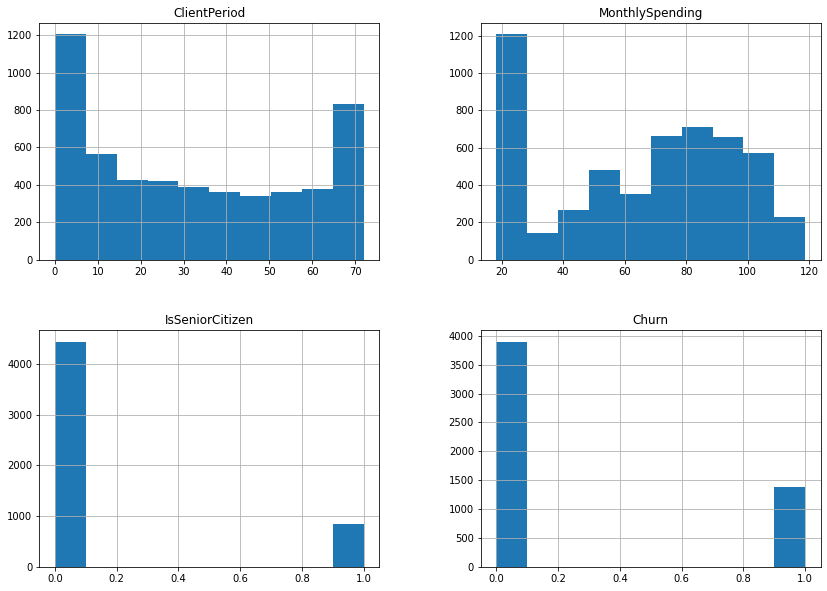

In [ ]:
#plt.hist(data[target_col])
data.hist(figsize=(14, 10))

In [ ]:
#pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker = "o", hist_kwds={"bins" : 20}, s=10, alpha = 0.8)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline


In [ ]:
# convert all num_cols to float (the some colse can be represented as a str
# and make standert scaler for numeric data
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"], errors='coerce')
scaler= StandardScaler()
data_scaler_num_cols =  pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)
data[num_cols] = pd.DataFrame(data_scaler_num_cols, columns=num_cols)
print(data_scaler_num_cols.head(3))
print(data_scaler_num_cols.info())

# replacing all np.Nan or null info in column
data.TotalSpent.fillna(data.TotalSpent.median(), inplace=True)
#test_data.TotalSpent.fillna(test_data.TotalSpent.median(), inplace=True)
data.isna().sum()

   ClientPeriod  MonthlySpending  TotalSpent
0      0.920767        -1.505447   -0.557323
1      1.613288        -1.294998   -0.184235
2     -1.279005         0.363737   -0.976549
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   float64
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   float64
dtypes: float64(3)
memory usage: 123.9 KB
None


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
# block when we made one-hot encoding
dummy_features = pd.get_dummies(data[cat_cols])
dummy_features.head()




,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
X = data_scaler_num_cols.join(dummy_features)
print(X.info())
X.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   float64
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   IsSeniorCitizen                               5282 non-null   int64  
 4   Sex_Female                                    5282 non-null   uint8  
 5   Sex_Male                                      5282 non-null   uint8  
 6   HasPartner_No                                 5282 non-null   uint8  
 7   HasPartner_Yes                                5282 non-null   uint8  
 8   HasChild_No                                   5282 non-null   uint8  
 9   HasChild_Yes                                  5282 non-null   u

ClientPeriod                                    0
MonthlySpending                                 0
TotalSpent                                      0
IsSeniorCitizen                                 0
Sex_Female                                      0
Sex_Male                                        0
HasPartner_No                                   0
HasPartner_Yes                                  0
HasChild_No                                     0
HasChild_Yes                                    0
HasPhoneService_No                              0
HasPhoneService_Yes                             0
HasMultiplePhoneNumbers_No                      0
HasMultiplePhoneNumbers_No phone service        0
HasMultiplePhoneNumbers_Yes                     0
HasInternetService_DSL                          0
HasInternetService_Fiber optic                  0
HasInternetService_No                           0
HasOnlineSecurityService_No                     0
HasOnlineSecurityService_No internet service    0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, data[target_col].values,  
                                                    train_size=0.8,
                                                    random_state=42)


In [ ]:
parameters = {
    'C'       : [0.001, 0.01, 0.1, 1, 10, 30, 50],
}
clf = GridSearchCV(
        LogisticRegression(),
        param_grid = parameters,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=10,
)

In [ ]:
regressor = LogisticRegression(max_iter=3000)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

#train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_pred)
print(test_auc)

0.6841366444713293


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set:', accuracy_score(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.783349101229896


In [ ]:
parameters = {
    'C'       : [0.001, 0.01, 0.1, 1, 10, 30, 50],
}
clf = GridSearchCV(
    LogisticRegression(),
    param_grid = parameters,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=10,
)
clf.fit(X_train,y_train)
clf.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


{'C': 50}

In [ ]:
regressor = LogisticRegression(max_iter=5000, C=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
print(test_auc)
print('Accuracy of logistic regression classifier on test set:', accuracy_score(y_test, y_pred))

0.6834947959475808
Accuracy of logistic regression classifier on test set: 0.78240302743614


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.0 MB/s eta 0:00:00


In [95]:
import catboost



In [97]:
df = pd.read_csv('./train.csv')
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


boost_model = catboost.CatBoostClassifier(n_estimators=500, cat_features=cat_cols)
boost_model.fit(X_train, y_train)
y_train_pred = boost_model.predict_proba(X_train)[:, 1]

Learning rate set to 0.035992
0:	learn: 0.6684054	total: 96.9ms	remaining: 48.4s
1:	learn: 0.6500308	total: 119ms	remaining: 29.6s
2:	learn: 0.6288289	total: 153ms	remaining: 25.4s
3:	learn: 0.6105596	total: 187ms	remaining: 23.1s
4:	learn: 0.6006227	total: 202ms	remaining: 20s
5:	learn: 0.5860924	total: 234ms	remaining: 19.3s
6:	learn: 0.5739373	total: 260ms	remaining: 18.3s
7:	learn: 0.5604726	total: 295ms	remaining: 18.2s
8:	learn: 0.5504165	total: 322ms	remaining: 17.6s
9:	learn: 0.5413021	total: 363ms	remaining: 17.8s
10:	learn: 0.5302164	total: 404ms	remaining: 17.9s
11:	learn: 0.5207688	total: 443ms	remaining: 18s
12:	learn: 0.5122144	total: 491ms	remaining: 18.4s
13:	learn: 0.5050692	total: 549ms	remaining: 19s
14:	learn: 0.4980811	total: 624ms	remaining: 20.2s
15:	learn: 0.4914468	total: 672ms	remaining: 20.3s
16:	learn: 0.4855223	total: 744ms	remaining: 21.1s
17:	learn: 0.4811310	total: 807ms	remaining: 21.6s
18:	learn: 0.4762693	total: 865ms	remaining: 21.9s
19:	learn: 0.472

In [98]:
y_valid_pred = boost_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_valid_pred)

(0.8961993038128389, 0.8263708388686729)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.